# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [79]:
import pandas as pd

In [6]:
# Common imports for numerical operations and file system tasks
import numpy as np
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt



In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/T5/RTA_Dataset.csv')

In [4]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [7]:
df= pd.read_csv('/content/drive/MyDrive/T5/RTA_Dataset.csv')

In [8]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [10]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [14]:
df['Number_of_casualties'].max()

8

In [15]:
df['Number_of_vehicles_involved'].min()

1

In [16]:
df['Number_of_casualties'].mode()

,Number_of_casualties
0,1


In [18]:
df['Number_of_casualties'].mean()

1.548148749594024

In [19]:
df["Educational_level"].fillna("Other" , inplace =True)


In [20]:
df["Vehicle_driver_relation"].fillna("Other" , inplace =True)


In [21]:
df["Driving_experience"].fillna("Other" , inplace =True)


In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [13]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [22]:

df['Number_of_casualties'] = df['Number_of_casualties'].transform(lambda x: x.fillna(x.mean()))

In [24]:

df['Educational_level'] = df['Educational_level'].transform(fill_with_mode)

NameError: name 'fill_with_mode' is not defined

In [26]:
df['Casualty_class'] = df['Casualty_class'].replace('nan', np.nan)
df['Casualty_class'] = df['Casualty_class'].replace('null', np.nan)
df['Casualty_class'] = df['Casualty_class'].fillna('1')



In [28]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [29]:
# Initialize LabelEncoder
le = LabelEncoder()

# Label encode 'Casualty_class' column
df['Casualty_class'] = le.fit_transform(df['Casualty_class'])



In [31]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# One-hot encode 'Casualty_class' column
name_encoded = ohe.fit_transform(df[['Casualty_class']])
name_encoded_df = pd.DataFrame(name_encoded, columns=ohe.get_feature_names_out(['Casualty_class']))


In [33]:

import seaborn as sns


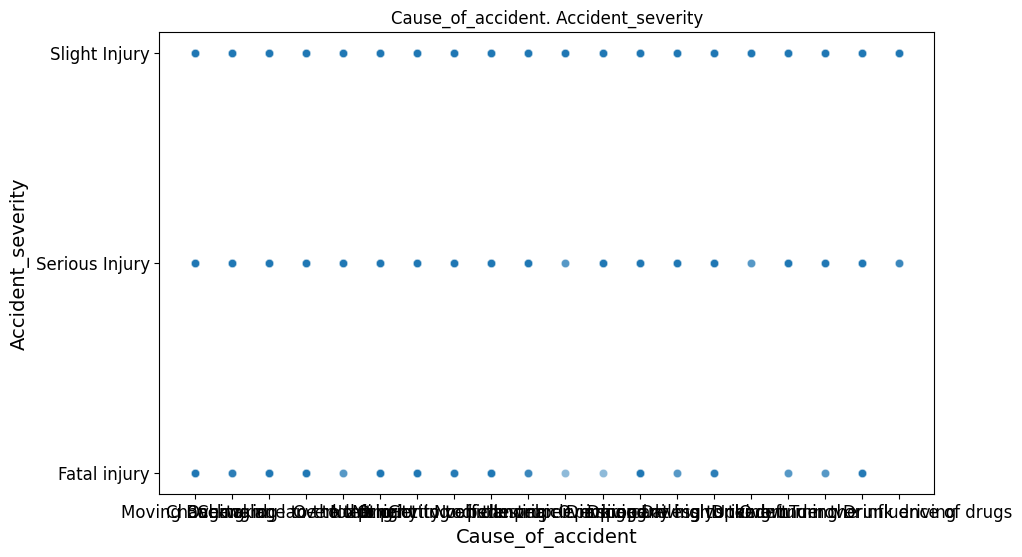

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cause_of_accident', y='Accident_severity', alpha=0.5)
plt.title('Cause_of_accident. Accident_severity')
plt.xlabel('Cause_of_accident')
plt.ylabel('Accident_severity')
plt.show()

In [45]:
df['The period with the most accident'] = df['Age_band_of_driver']-2024

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [53]:

df[''] = df['Day_of_week'].astype(float)


ValueError: could not convert string to float: 'Monday'

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [48]:
corr_matrix = df.corr()

selected_columns = ['Education_level', 'Type_of_vehicle', 'Owner_of_vehicle', 'Driving_experience', ]
selected_corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

ValueError: could not convert string to float: '17:02:00'

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Educationl_level', y='Vehicle_driven_relation', alpha=0.5)
plt.title('Educationl_level. Vehicle_driven_relation')
plt.xlabel('Educationl_level')
plt.ylabel('Vehicle_driven_relation')
plt.show()

ValueError: Could not interpret value `Educationl_level` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

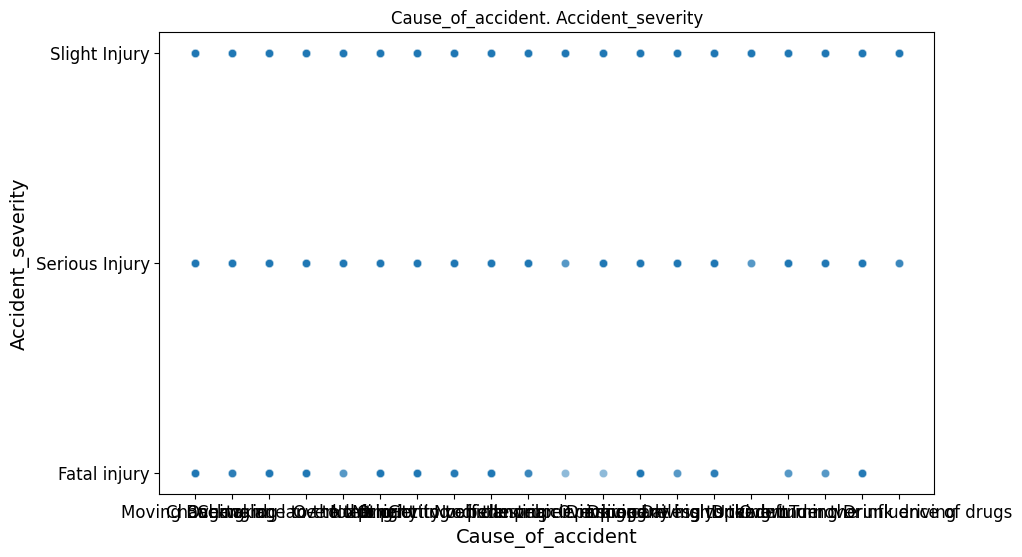

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cause_of_accident', y='Accident_severity', alpha=0.5)
plt.title('Cause_of_accident. Accident_severity')
plt.xlabel('Cause_of_accident')
plt.ylabel('Accident_severity')
plt.show()

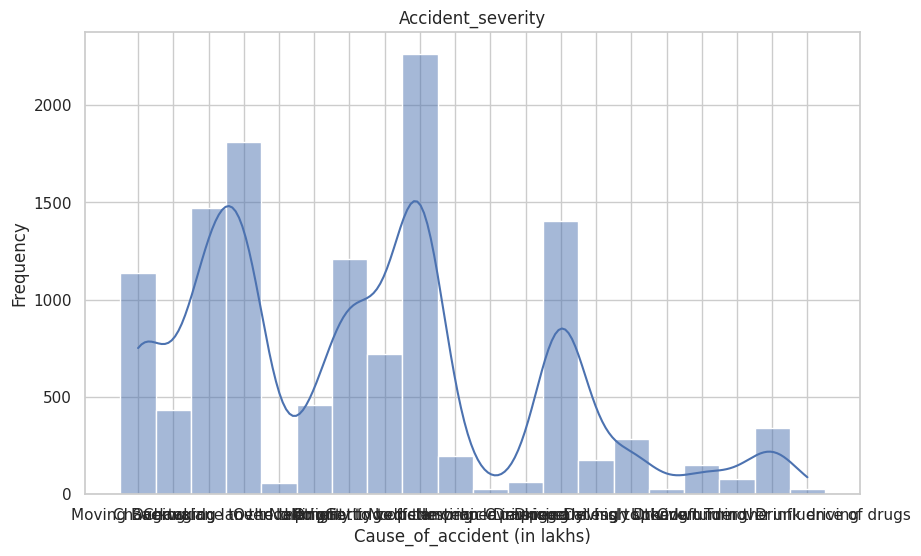

In [57]:
# Set the plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Cause_of_accident'].dropna(), bins=30, kde=True)
plt.title('Accident_severity')
plt.xlabel('Cause_of_accident (in lakhs)')
plt.ylabel('Frequency')
plt.show()

In [59]:
# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Accident')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Cause_of_accident')
    ax.set_ylabel('Accident_severity')

plt.show()

NameError: name 'axs' is not defined

TypeError: Axes.bxp() got an unexpected keyword argument 'bins'

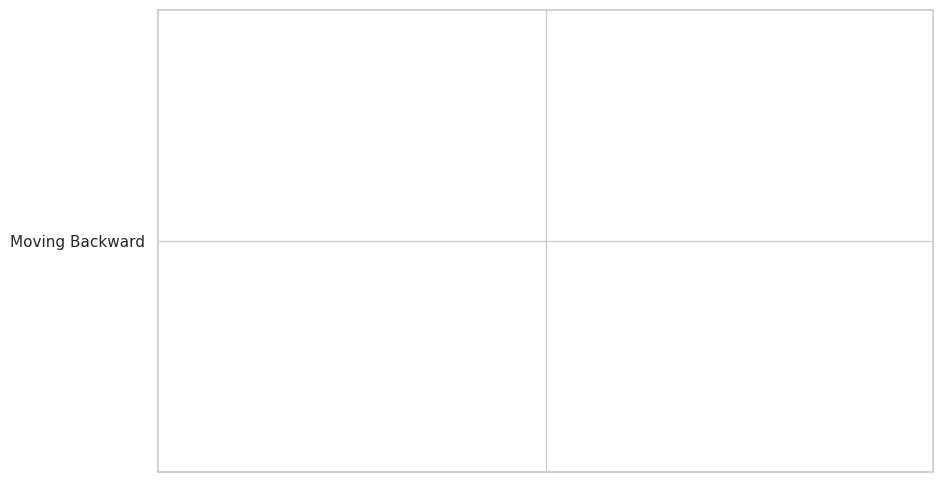

In [60]:
# Set the plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(df['Cause_of_accident'].dropna(), bins=30, kde=True)
plt.title('Accident_severity')
plt.xlabel('Cause_of_accident (in lakhs)')
plt.ylabel('Frequency')
plt.show()

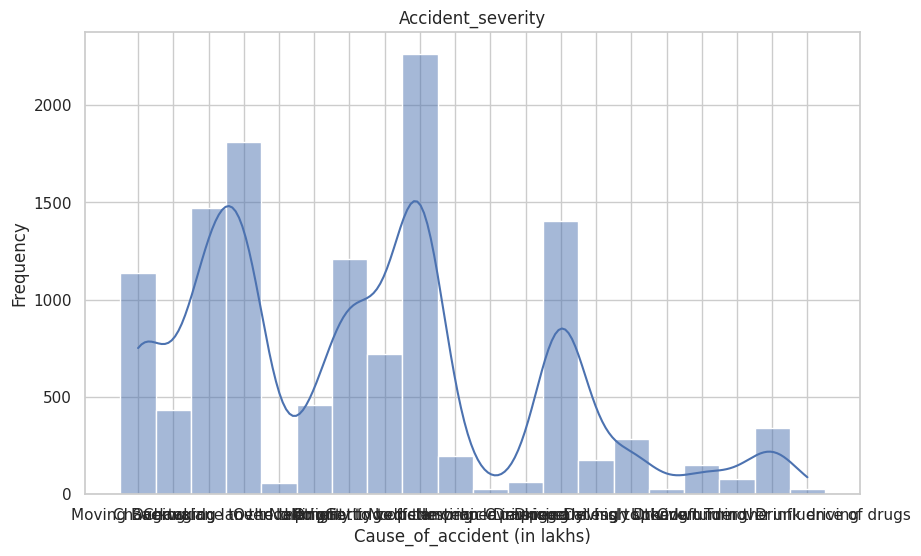

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Cause_of_accident'].dropna(), bins=30, kde=True)
plt.title('Accident_severity')
plt.xlabel('Cause_of_accident (in lakhs)')
plt.ylabel('Frequency')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X and y are defined
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)


LogisticRegression(random_state=42)

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree regressor with max_depth=2 and random_state=42
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

# Fit the Decision Tree regressor to the data
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2, random_state=42)

#### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

#### K-Neighbors Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier


In [70]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

ValueError: could not convert string to float: '13:55:00'

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
#Roc Curve and AUC


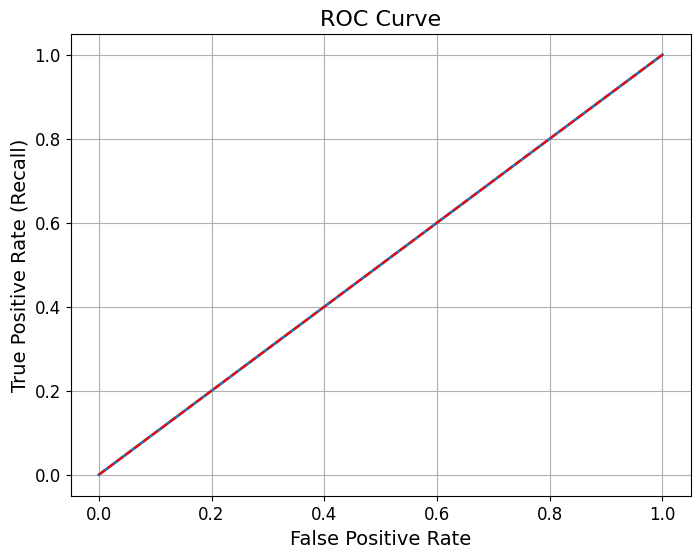

In [ ]:
from sklearn.metrics import roc_curve
#Compute the Receiver Operating Characteristic (ROC) curve using the true labels (y_train_5)
# and the predicted probability scores for the positive class (y_scores_dmy)
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)

# Plot the ROC curve using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fprr, tprr, linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference (random classifier)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Recall)', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.grid(True)
plt.show()



In [ ]:
precision_score and recall_score

In [76]:
from sklearn.metrics import precision_score,
recall_score, f1_score, accuracy_score

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-76-ddeff6bc0d0c>, line 1)

In [78]:
print("Precision:", precision_score(y_test,y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

NameError: name 'precision_score' is not defined

In [ ]:

confusion_matrix = metrics.confusion_matrix(y_test,
                                            y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1, 2])

cm_display.plot()
plt.show()

### Answer Here: